## Regresion Polinomial & Feature engineering

In [20]:
import pandas as pd

In [21]:
data = pd.read_csv('winequality-red.csv')

### Red Wine Quality Data

Se aplicará regresión para crear un modelo de la calidad de vino en función de características del mismo, siendo 1 el peor vino y 10 el mejor.

Variables de entrada:
1. fixed acidity 
2. volatile acidity 
3. citric acid 
4. residual sugar 
5. chlorides 
6. free sulfur dioxide 
7. total sulfur dioxide 
8. density 
9. pH 
10. sulphates 
11. alcohol 

Varaible a predecir: 
12. quality (puntuacion  entre 0 y 10) 



In [22]:
data.head(11)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


### Instrucciones

1. Seleccionar y transformar(generando las combinaciones polinomiales para un polinomio de grado dos o tres a elección) las features que considere que son las mejores para predecir la calidad del vino, utilizar como minimo 2 features. Para seleccionar las features, hacer un analisis exploratorio por ejemplo(pero no limitado a ):  graficando y viendo la forma en que se comportan los datos.

 Por ejemplo, se tienen las features "a" y "b" y seleccionamos polinomio de grado 2, hacemos feature engineering para obtener :
 
 $[a,b,a^{2},b^{2},ab]$
 
 No olvidar el "bias" (parámetro multiplicado por 1) ,con lo cual el dataset puede quedar con las columnas:
 
 $[1,a,b,a^{2},b^{2},ab]$
2. Una vez transformada la data aplicar regresion lineal con las features polinomiales usando Tensorflow.

Requisitos adicionales:
* Se debe agregar al notebook un screenshot del grafo de tensorboard, simplificando(usando  names , y name_scope como visto en clase).

* Se debe generar un directorio de logs de tensorboard para cada corrida/experimento , con cada directorio identificando facilmente la configuración del experimento como visto en clase, por ejemplo para un experimento con learning rate = 0.1 , y polinomio grado 2  crear un directorio: lr=0.1_polinomio_grado=2. (Agregar al notebook un screenshot de estas gráficas)

* Concluir en markdown cual es el mejor modelo para este caso basado en la comparativa entre curvas de costo/error en tensorboard.

In [23]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Paso 1: Analisis exploratorio Simple para la eleccion de las 3 features mas significativas.

**Matriz de correlacion**

In [24]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


Por los bajos parametros que se obtienen en la matriz de correlacion, no se utilizara este criterio para la eleccion de la mejro feature

#### Analisis grafico

In [25]:
Y_real = data['quality']
dictX = {0:'fixed acidity', 1:'volatile acidity',2:'citric acid',3:'residual sugar',4:'chlorides',
         5:'free sulfur dioxide',6:'total sulfur dioxide',7:'density',8:'pH',9:'sulphates', 10:'alcohol'}

len(dictX)

11

Grafica de cada feature para compararlo con el valor de Quality

**En base a las graficas anteriores se creara el siguiente nuevo DataFream eligiendo las variables que parecen tener mas correlacion**

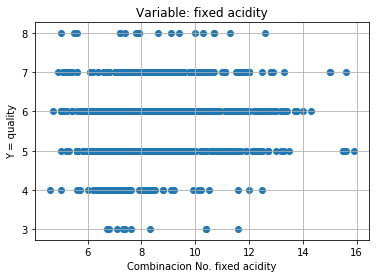

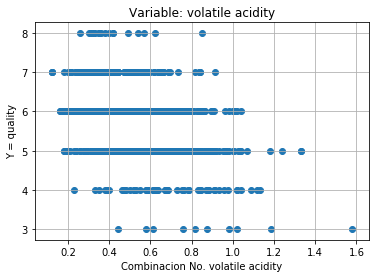

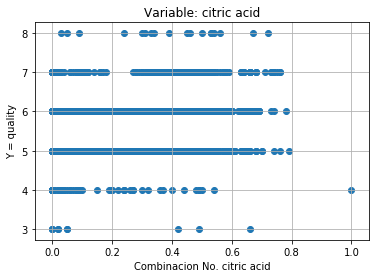

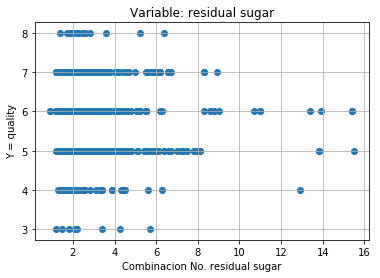

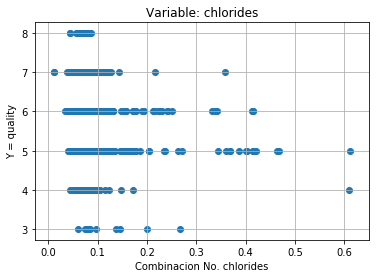

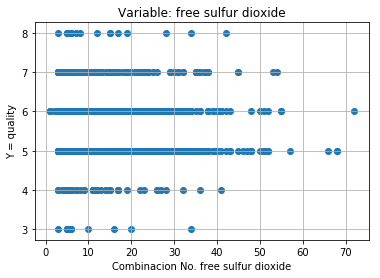

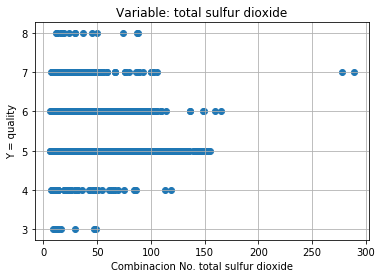

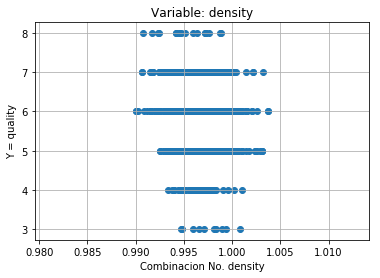

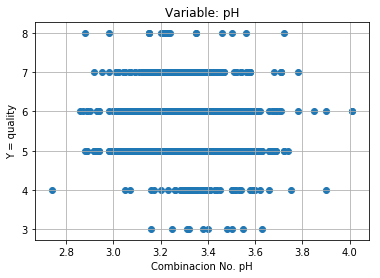

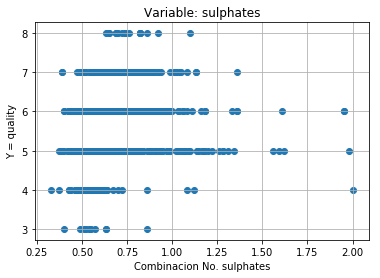

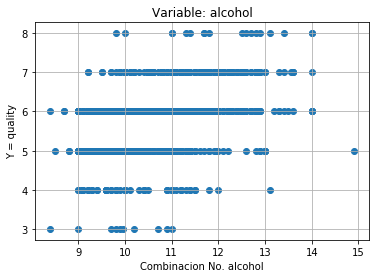

In [26]:
for i in range(11):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.grid()
    ax.scatter(data[dictX[i]],Y_real,label='Variable: '+str(i))
    ax.set_xlabel('Combinacion No. '+str(dictX[i]))
    ax.set_ylabel('Y = quality')
    ax.set_title('Variable: '+str(dictX[i]))
    plt.show()

In [27]:
firstCleanDF = data[['quality','volatile acidity','density','pH','alcohol']]
firstCleanDF.head(10)

,quality,volatile acidity,density,pH,alcohol
0,5,0.70,0.9978,3.51,9.4
1,5,0.88,0.9968,3.20,9.8
2,5,0.76,0.9970,3.26,9.8
3,6,0.28,0.9980,3.16,9.8
4,5,0.70,0.9978,3.51,9.4
5,5,0.66,0.9978,3.51,9.4
6,5,0.60,0.9964,3.30,9.4
7,7,0.65,0.9946,3.39,10.0
8,7,0.58,0.9968,3.36,9.5
9,5,0.50,0.9978,3.35,10.5


**Creacion de los nuevos valores**

In [28]:
Y_real = np.asanyarray(data['quality'])
dictX = {0:'volatile acidity',1:'density',2:'pH',3:'alcohol'}
len(dictX)

4

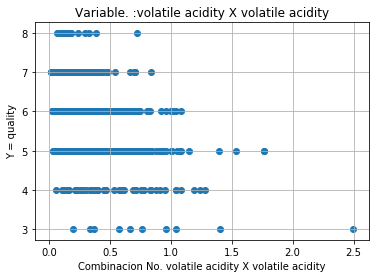

0     0.4900
1     0.7744
2     0.5776
3     0.0784
4     0.4900
5     0.4356
6     0.3600
7     0.4225
8     0.3364
9     0.2500
10    0.3364
Name: volatile acidity, dtype: float64


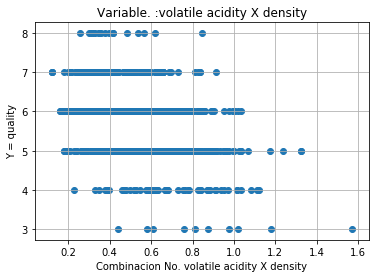

0     0.698460
1     0.877184
2     0.757720
3     0.279440
4     0.698460
5     0.658548
6     0.597840
7     0.646490
8     0.578144
9     0.498900
10    0.577622
dtype: float64


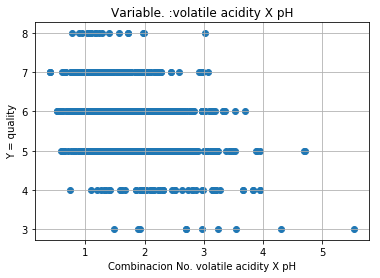

0     2.4570
1     2.8160
2     2.4776
3     0.8848
4     2.4570
5     2.3166
6     1.9800
7     2.2035
8     1.9488
9     1.6750
10    1.9024
dtype: float64


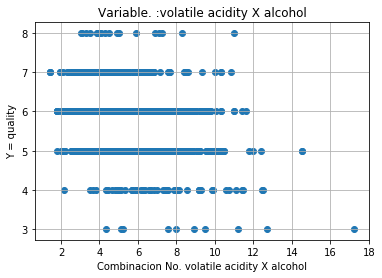

0     6.580
1     8.624
2     7.448
3     2.744
4     6.580
5     6.204
6     5.640
7     6.500
8     5.510
9     5.250
10    5.336
dtype: float64


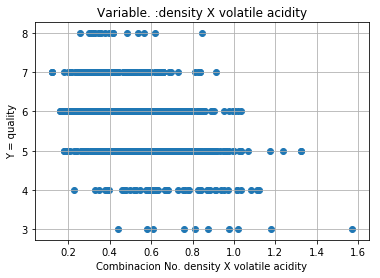

0     0.698460
1     0.877184
2     0.757720
3     0.279440
4     0.698460
5     0.658548
6     0.597840
7     0.646490
8     0.578144
9     0.498900
10    0.577622
dtype: float64


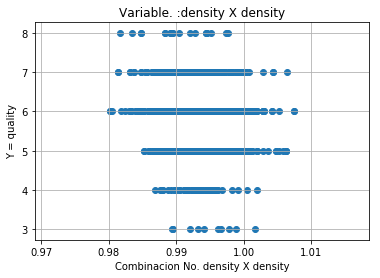

0     0.995605
1     0.993610
2     0.994009
3     0.996004
4     0.995605
5     0.995605
6     0.992813
7     0.989229
8     0.993610
9     0.995605
10    0.991817
Name: density, dtype: float64


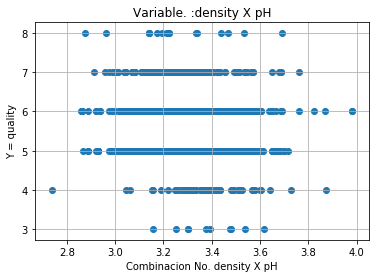

0     3.502278
1     3.189760
2     3.250220
3     3.153680
4     3.502278
5     3.502278
6     3.288120
7     3.371694
8     3.349248
9     3.342630
10    3.266552
dtype: float64


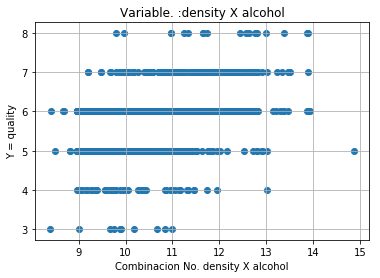

0      9.37932
1      9.76864
2      9.77060
3      9.78040
4      9.37932
5      9.37932
6      9.36616
7      9.94600
8      9.46960
9     10.47690
10     9.16228
dtype: float64


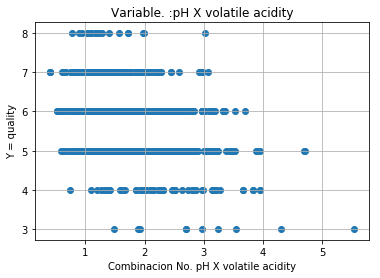

0     2.4570
1     2.8160
2     2.4776
3     0.8848
4     2.4570
5     2.3166
6     1.9800
7     2.2035
8     1.9488
9     1.6750
10    1.9024
dtype: float64


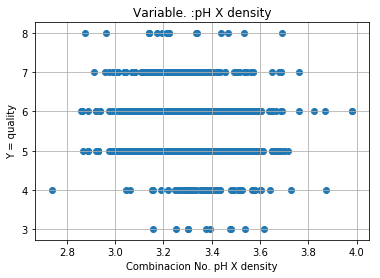

0     3.502278
1     3.189760
2     3.250220
3     3.153680
4     3.502278
5     3.502278
6     3.288120
7     3.371694
8     3.349248
9     3.342630
10    3.266552
dtype: float64


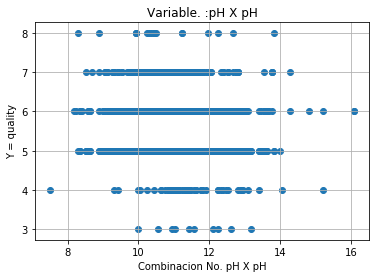

0     12.3201
1     10.2400
2     10.6276
3      9.9856
4     12.3201
5     12.3201
6     10.8900
7     11.4921
8     11.2896
9     11.2225
10    10.7584
Name: pH, dtype: float64


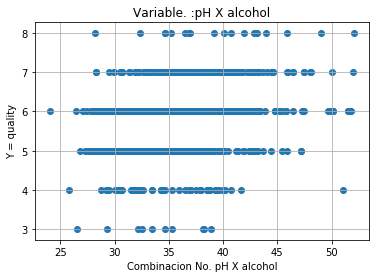

0     32.994
1     31.360
2     31.948
3     30.968
4     32.994
5     32.994
6     31.020
7     33.900
8     31.920
9     35.175
10    30.176
dtype: float64


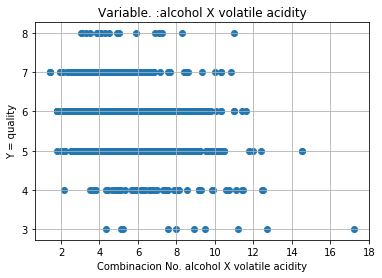

0     6.580
1     8.624
2     7.448
3     2.744
4     6.580
5     6.204
6     5.640
7     6.500
8     5.510
9     5.250
10    5.336
dtype: float64


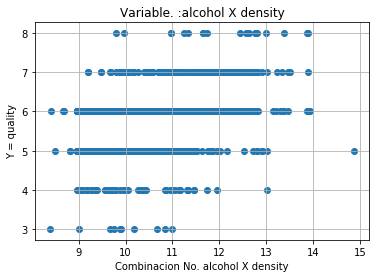

0      9.37932
1      9.76864
2      9.77060
3      9.78040
4      9.37932
5      9.37932
6      9.36616
7      9.94600
8      9.46960
9     10.47690
10     9.16228
dtype: float64


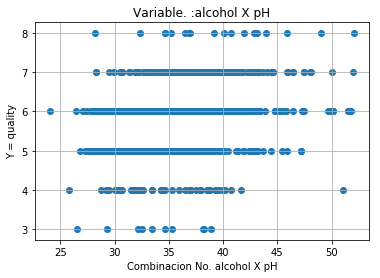

0     32.994
1     31.360
2     31.948
3     30.968
4     32.994
5     32.994
6     31.020
7     33.900
8     31.920
9     35.175
10    30.176
dtype: float64


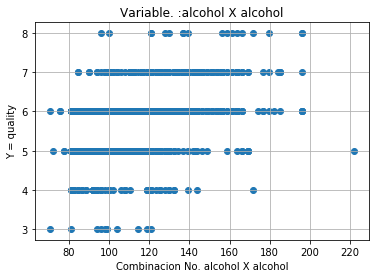

0      88.36
1      96.04
2      96.04
3      96.04
4      88.36
5      88.36
6      88.36
7     100.00
8      90.25
9     110.25
10     84.64
Name: alcohol, dtype: float64


In [29]:
lista01 = []
for j in range (len(dictX)):
    lista01 = []
    for i in range(len(dictX)):
        lista01.append(data[dictX[j]]*data[dictX[i]])
        fig = plt.figure()
        ax = fig.add_subplot(1,1,1)
        ax.grid()
        ax.scatter(lista01[i],Y_real,label='Variable. :'+str(j)+' X '+str(i))
        ax.set_xlabel('Combinacion No. '+str(dictX[j])+' X '+str(dictX[i]))
        ax.set_ylabel('Y = quality')
        ax.set_title('Variable. :'+str(dictX[j])+' X '+str(dictX[i]))
        plt.show()
        print(lista01[i][0:11])

**Se toman las siguientes variables para realizar el modelo**
* density
* volatile acidity

# Paso 2: Se ha seleccionado las dos features a utilizar en base al paso anterior

In [30]:
aFeature = np.asanyarray(data['density'])
bFeature = np.asanyarray(data['volatile acidity'])


# Paso 3: Analisis y creacion del modelo en tensorFlow

### Creacion del Grafo: (Polinomio de grado dos)

In [31]:
# Creacion del Grafo:
polinomialRegGraph = tf.Graph()

with polinomialRegGraph.as_default():
    # Creacion de las variables de parametros:
    
    
    with tf.name_scope('PureData') as scope:
        #Stablish variables, data inside the graph (Training Parameters), depends of the significance of the variable
        #it would be zero.
        
        weight0 = tf.Variable(0.8,name='W0')
        weight1 = tf.Variable(0.7,name='W1')
        weight2 = tf.Variable(0.6,name='W2')
        weight3 = tf.Variable(0.9,name='W3')
        weight4 = tf.Variable(0.5,name='W4')
        weight5 = tf.Variable(0.7,name='W5')
        
        #Stablish placeholders, data from outside the graph.
        a = tf.placeholder(dtype=tf.float32,name='a_feature') #density
        b = tf.placeholder(dtype=tf.float32,name='b_feature') #volatile acidity
        
        
        y = tf.placeholder(dtype=tf.float32,name='Y_hat')
        lr = tf.placeholder(dtype=tf.float16,name='LearningRate')
        
        #Initializing the variables
        initVar = tf.global_variables_initializer()
    
    # Prediction of Y acording to the model using tensor flow operations, hipothesis declaration:
    with tf.name_scope('Predict_Operation') as scope:
        #Y_hat  = b0 + b1*a + b2*b + b3*a^2 + b4*b^2 + b5*ab
        
        #Products Definition:
        firstProduct = tf.multiply(weight1,a)
        secondProduct = tf.multiply(weight2,b)
        thirdProduct = tf.multiply(weight3,tf.pow(a,2))
        fourthProduct = tf.multiply(weight4,tf.pow(b,2))
        fifthProduct = tf.multiply(weight5,tf.multiply(a,b))
        
        #sumatory Definition:
        firstSuma = tf.add(firstProduct,secondProduct)
        secondSuma = tf.add(thirdProduct,fourthProduct)
        thirdSuma = tf.add(fifthProduct,weight0)
        preHipothesis = tf.add(firstSuma,secondSuma)
        Y_hat = tf.add(preHipothesis,thirdSuma)
        
    # Minimize function, application of the gradiente descent:
    with tf.name_scope('ErrorFunction') as scope:
        error = 0.5*tf.reduce_mean(tf.pow((Y_real-Y_hat),2))
        errorTracking = tf.summary.scalar(name='ErrorTrack', tensor=error)
    
    # Graddient descent aplication:
    with tf.name_scope('OptimizerMethod') as scope:
        optim = tf.train.GradientDescentOptimizer(lr).minimize(error)

In [32]:
def trainingFunction(ite,showError,learnR):
    tf.reset_default_graph()
    with tf.Session(graph = polinomialRegGraph) as session:
        #First we have to create the write file directory:
        writer = tf.summary.FileWriter('./graphs/lr_'+str(learnR)+'_polinomioGradoDos',session.graph)
        session.run(initVar)
        #Now we start the training:
        for i in range(ite):
            #Execute the two main operations, preddiction and error calculation feeding the data from outside the graph
            _,c,errorValue,b0_val,b1_val,b2_val, b3_val,b4_val,b5_val = session.run([optim,errorTracking,error,weight0,weight1,weight2,weight3,weight4,weight5], feed_dict={lr:learnR, a:aFeature, b:bFeature, y:Y_real})
            
            
            writer.add_summary(c,i)
            if i%showError ==0:
                print('Epoch', i,"Err",errorValue,"w0",b0_val,"w1",b1_val,"w2",b2_val,
                     'w3',b3_val,'w4',b4_val,'w5',b5_val)    
        writer.close() 

In [33]:
trainingFunction(ite=2000,showError=200,learnR=0.003)

Epoch 0 Err 3.3787313 w0 0.8072122 w1 0.70718783 w2 0.6034561 w3 0.9071636 w4 0.50182945 w5 0.70344454
Epoch 200 Err 0.6146715 w0 1.4067633 w1 1.3046129 w2 0.84132785 w3 1.5024709 w4 0.5958241 w5 0.94048035
Epoch 400 Err 0.5502924 w0 1.5018909 w1 1.3992527 w2 0.81101453 w3 1.5966264 w4 0.5308722 w5 0.9101987
Epoch 600 Err 0.52205086 w0 1.5397583 w1 1.4368179 w2 0.754033 w3 1.6338936 w4 0.45244113 w5 0.8533342
Epoch 800 Err 0.4970942 w0 1.5698582 w1 1.4666427 w2 0.6969144 w3 1.6634451 w4 0.37638828 w5 0.7963319
Epoch 1000 Err 0.47472617 w0 1.5977385 w1 1.494254 w2 0.6424406 w3 1.690791 w4 0.30426008 w5 0.7419653
Epoch 1200 Err 0.45467475 w0 1.6240824 w1 1.5203352 w2 0.59077746 w3 1.7166116 w4 0.23603256 w5 0.6903997
Epoch 1400 Err 0.43669957 w0 1.6490356 w1 1.5450304 w2 0.54180986 w3 1.7410507 w4 0.1715187 w5 0.64151996
Epoch 1600 Err 0.42058578 w0 1.6726782 w1 1.56842 w2 0.4953978 w3 1.764189 w4 0.11052272 w5 0.5951868
Epoch 1800 Err 0.4061404 w0 1.6950811 w1 1.5905738 w2 0.451406 w3 1

In [34]:
trainingFunction(ite=4000,showError=400,learnR=0.0003)

Epoch 0 Err 3.3787313 w0 0.800721 w1 0.7007185 w2 0.60034555 w3 0.9007161 w4 0.50018287 w5 0.7003443
Epoch 400 Err 1.7585253 w0 1.0354135 w1 0.9346137 w2 0.709606 w3 1.1338161 w4 0.55594814 w5 0.8092376
Epoch 800 Err 1.0800364 w0 1.1892579 w1 1.087924 w2 0.7753453 w3 1.286593 w4 0.585589 w5 0.8747506
Epoch 1200 Err 0.79363614 w0 1.2909142 w1 1.1892151 w2 0.8130568 w3 1.3875186 w4 0.5984444 w5 0.91232646
Epoch 1600 Err 0.6705279 w0 1.358875 w1 1.2569191 w2 0.83273536 w3 1.4549683 w4 0.6005401 w5 0.9319279
Epoch 2000 Err 0.6154771 w0 1.4050692 w1 1.3029281 w2 0.84082896 w3 1.5007932 w4 0.59576195 w5 0.93998206
Epoch 2400 Err 0.5888374 w0 1.4371963 w1 1.3349152 w2 0.8414976 w3 1.5326407 w4 0.58661664 w5 0.9406358
Epoch 2800 Err 0.5741049 w0 1.4602218 w1 1.3578303 w2 0.8374253 w3 1.5554453 w4 0.5747214 w5 0.936563
Epoch 3200 Err 0.5644072 w0 1.4773512 w1 1.3748678 w2 0.83034164 w3 1.5723919 w4 0.56111825 w5 0.9294894
Epoch 3600 Err 0.5568826 w0 1.4906511 w1 1.3880888 w2 0.82136333 w3 1.585

In [35]:
trainingFunction(ite=8000,showError=800,learnR=0.00003)

Epoch 0 Err 3.3787313 w0 0.8000721 w1 0.7000718 w2 0.60003453 w3 0.90007156 w4 0.5000183 w5 0.7000344
Epoch 800 Err 2.9333558 w0 0.85533196 w1 0.7551449 w2 0.6263717 w3 0.9549587 w4 0.5138671 w5 0.72628355
Epoch 1600 Err 2.5593057 w0 0.90607405 w1 0.80571496 w2 0.6502741 w3 1.0053576 w4 0.52625227 w5 0.7501056
Epoch 2400 Err 2.24512 w0 0.95267725 w1 0.85215974 w2 0.67194635 w3 1.0516447 w4 0.5372977 w5 0.77170515
Epoch 3200 Err 1.9811847 w0 0.99548817 w1 0.89482474 w2 0.691576 w3 1.094164 w4 0.54711616 w5 0.79126877
Epoch 4000 Err 1.7594273 w0 1.0348245 w1 0.93402624 w2 0.7093347 w3 1.1332315 w4 0.55581135 w5 0.8089674
Epoch 4800 Err 1.5730721 w0 1.0709776 w1 0.9700549 w2 0.7253798 w3 1.1691357 w4 0.563478 w5 0.824958
Epoch 5600 Err 1.4164327 w0 1.104214 w1 1.0031763 w2 0.73985535 w3 1.2021425 w4 0.57020277 w5 0.83938396
Epoch 6400 Err 1.284736 w0 1.1347779 w1 1.0336336 w2 0.7528936 w3 1.2324941 w4 0.5760657 w5 0.8523775
Epoch 7200 Err 1.1739771 w0 1.1628932 w1 1.0616503 w2 0.76461554 

In [36]:
trainingFunction(ite=80000,showError=8000,learnR=0.00003)

Epoch 0 Err 3.3787313 w0 0.8000721 w1 0.7000718 w2 0.60003453 w3 0.90007156 w4 0.5000183 w5 0.7000344
Epoch 8000 Err 1.0807914 w0 1.1887649 w1 1.0874304 w2 0.7751322 w3 1.2861024 w4 0.5854908 w5 0.8745385
Epoch 16000 Err 0.6707983 w0 1.3585672 w1 1.2566086 w2 0.83263296 w3 1.4546604 w4 0.6005164 w5 0.93182766
Epoch 24000 Err 0.58892024 w0 1.4370148 w1 1.3347293 w2 0.8414763 w3 1.532455 w4 0.58664656 w5 0.94061565
Epoch 32000 Err 0.56444335 w0 1.4772401 w1 1.3747504 w2 0.83036846 w3 1.572275 w4 0.56118864 w5 0.92951685
Epoch 40000 Err 0.5503643 w0 1.5013775 w1 1.3987465 w2 0.8112669 w3 1.5961268 w4 0.53132516 w5 0.91044873
Epoch 48000 Err 0.5385112 w0 1.5186478 w1 1.4158778 w2 0.7891333 w3 1.6131341 w4 0.5000323 w5 0.88836706
Epoch 56000 Err 0.52744496 w0 1.532897 w1 1.4300082 w2 0.7660192 w3 1.6271601 w4 0.4685909 w5 0.8653192
Epoch 64000 Err 0.5169002 w0 1.5457546 w1 1.4427439 w2 0.7427816 w3 1.639799 w4 0.43750176 w5 0.8421744
Epoch 72000 Err 0.5068196 w0 1.5580418 w1 1.4547566 w2 0.

# Paso 4: Conclusiones

Vemos que el modelo que genera el menor error es que posee el **learning rate mas pequenio y por ende, se necesitan mas epochs para la convergencia**. De igual manera en base al valor de las variables de los pesos (las w) se concluye lo siguiente:

* Valor del biass: 0.5068196
* Valor feature a: 1.4547566
* Valor feature b: 0.7198934
* Valor feature a^2: 1.6516382
* Valor feature b^2: 0.40694067
* Valor feature a*b: 0.8192862 

Podemos observar que la combinacion mas significativa para el modelo es la de la variable a^2 (density) cuadrado. Esta es la variable que al utilizarla en un modelo de regresion cuadratica, mas significancia posee.

# Paso 5 Anexos: Imagenes del Grafo

### Grafo principal:

<img src="main.png">

### Grafos secundarios:

<img src="graph01.png">
<img src="graph02.png">
<img src="graph03.png">
<img src="graph04.png">

### Imagenes del error monitoreado



